# Classification of Cars using Car Evaluation Dataset 

### Kaan Akkartal (2020661) - Marketing Analytics Term Project 

# 1. Library and Data Loading

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
cardata = pd.read_csv("cardata.csv", skiprows=1, names=["buying","maintenance","doors","persons","lug_boot","safety","class"])
df = cardata.copy()
df.head()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# 2. Descriptive Data Analysis 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   object
 3   persons      1727 non-null   object
 4   lug_boot     1727 non-null   object
 5   safety       1727 non-null   object
 6   class        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
df.describe()

,buying,maintenance,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,5more,more,med,high,unacc
freq,432,432,432,576,576,576,1209


## 2.1. Data Visualization and Missing Value Analysis

In [5]:
df.isnull().sum()

buying         0
maintenance    0
doors          0
persons        0
lug_boot       0
safety         0
class          0
dtype: int64

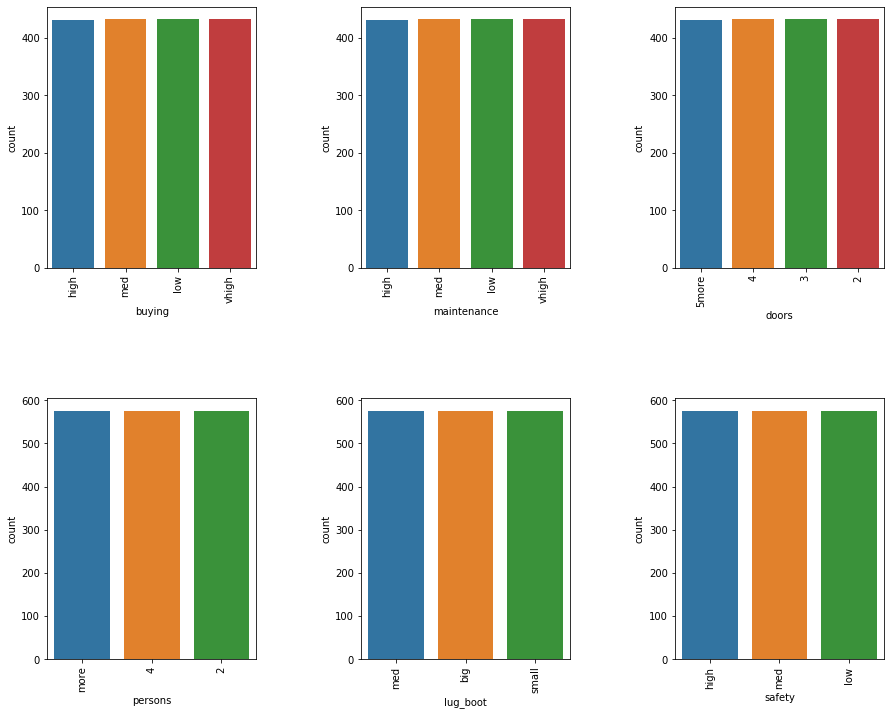

In [6]:
plt.figure(figsize = (15,12)) 
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

plt.subplot(2,3,1)
sns.countplot(x = "buying", data = df).set_xticklabels(labels = df.buying.value_counts().index, rotation = 90)

plt.subplot(2,3,2)
sns.countplot(x = "maintenance", data = df).set_xticklabels(labels = df.maintenance.value_counts().index, rotation = 90)

plt.subplot(2,3,3)
sns.countplot(x = "doors", data = df).set_xticklabels(labels = df.doors.value_counts().index, rotation = 90)

plt.subplot(2,3,4)
sns.countplot(x = "persons", data = df).set_xticklabels(labels = df.persons.value_counts().index, rotation = 90)

plt.subplot(2,3,5)
sns.countplot(x = "lug_boot", data = df).set_xticklabels(labels = df.lug_boot.value_counts().index, rotation = 90)

plt.subplot(2,3,6)
sns.countplot(x = "safety", data = df).set_xticklabels(labels = df.safety.value_counts().index, rotation = 90);

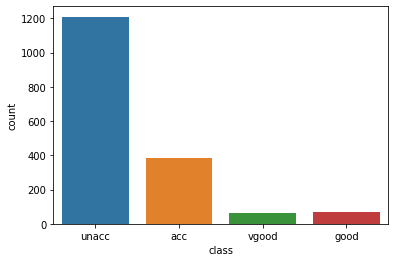

In [7]:
sns.countplot(x = "class", data = df);

In [8]:
features = list(df.axes)[-1]
features

Index(['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety',
       'class'],
      dtype='object')

In [9]:
k = 0
for i in features:
    print(df[features[k]].value_counts())
    print(" ")
    k = k+1

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
 
high     432
med      432
low      432
vhigh    431
Name: maintenance, dtype: int64
 
5more    432
4        432
3        432
2        431
Name: doors, dtype: int64
 
more    576
4       576
2       575
Name: persons, dtype: int64
 
med      576
big      576
small    575
Name: lug_boot, dtype: int64
 
high    576
med     576
low     575
Name: safety, dtype: int64
 
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64
 


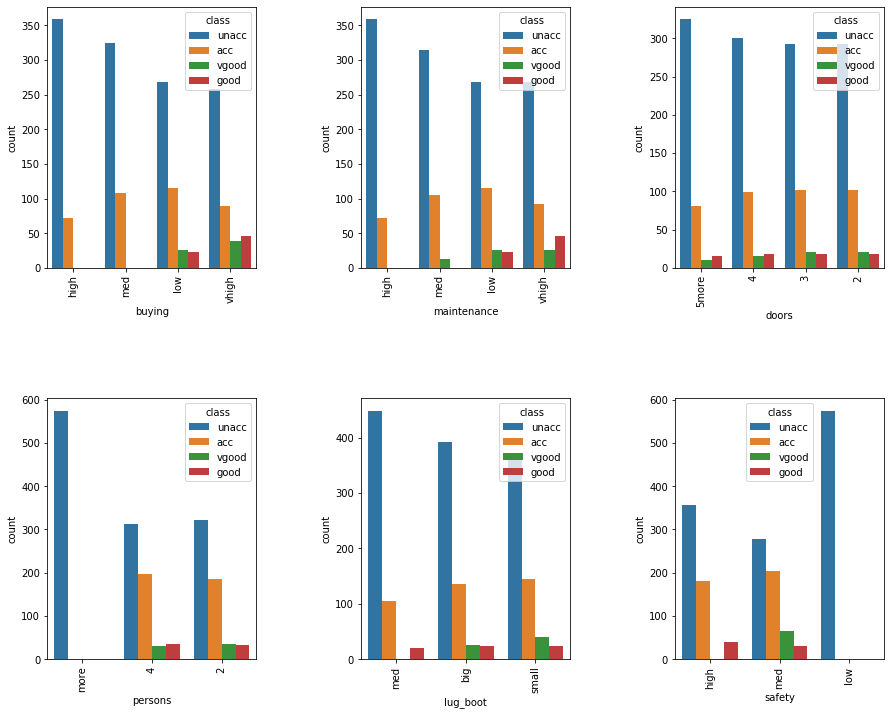

In [10]:
plt.figure(figsize = (15,12)) 
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)


plt.subplot(2,3,1)
sns.countplot(x = "buying", data = df, hue = "class").set_xticklabels(labels = df.buying.value_counts().index, rotation = 90)

plt.subplot(2,3,2)
sns.countplot(x = "maintenance", data = df, hue = "class").set_xticklabels(labels = df.maintenance.value_counts().index, rotation = 90)

plt.subplot(2,3,3)
sns.countplot(x = "doors", data = df, hue = "class").set_xticklabels(labels = df.doors.value_counts().index, rotation = 90)

plt.subplot(2,3,4)
sns.countplot(x = "persons", data = df, hue = "class").set_xticklabels(labels = df.persons.value_counts().index, rotation = 90)

plt.subplot(2,3,5)
sns.countplot(x = "lug_boot", data = df, hue = "class").set_xticklabels(labels = df.lug_boot.value_counts().index, rotation = 90)

plt.subplot(2,3,6)
sns.countplot(x = "safety", data = df, hue = "class").set_xticklabels(labels = df.safety.value_counts().index, rotation = 90);

## 2.2. Data Preparation 

In [11]:
df.head()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [12]:
buying_scale = {"low":1, "medium":2, "high":3, "vhigh":4}
df["buy_scale"] = df["buying"].replace(buying_scale)

maintenance_scale = {"low":1, "medium":2, "high":3, "vhigh":4}
df["maint_scale"] = df["maintenance"].replace(maintenance_scale)

lug_boot_scale = {"small":1, "med":2, "big":3}
df["lug_scale"] = df["lug_boot"].replace(lug_boot_scale)

safety_scale = {"low":1, "med":2, "high":3}
df["safety_scale"] = df["safety"].replace(safety_scale)

class_scale = {"unacc":1, "acc":2, "good":3, "vgood":4}
df["class_scale"] = df["class"].replace(class_scale)

doors_scale = {"2":1, "3":2, "4":3, "5more":4}
df["door_scale"] = df["doors"].replace(doors_scale)

persons_scale = {"2":1, "4":2, "more":3}
df["person_scale"] = df["persons"].replace(persons_scale)

df.head()



,buying,maintenance,doors,persons,lug_boot,safety,class,buy_scale,maint_scale,lug_scale,safety_scale,class_scale,door_scale,person_scale
0,vhigh,vhigh,2,2,small,med,unacc,4,4,1,2,1,1,1
1,vhigh,vhigh,2,2,small,high,unacc,4,4,1,3,1,1,1
2,vhigh,vhigh,2,2,med,low,unacc,4,4,2,1,1,1,1
3,vhigh,vhigh,2,2,med,med,unacc,4,4,2,2,1,1,1
4,vhigh,vhigh,2,2,med,high,unacc,4,4,2,3,1,1,1


In [13]:
df.loc[df["persons"] == "4"]

,buying,maintenance,doors,persons,lug_boot,safety,class,buy_scale,maint_scale,lug_scale,safety_scale,class_scale,door_scale,person_scale
8,vhigh,vhigh,2,4,small,low,unacc,4,4,1,1,1,1,2
9,vhigh,vhigh,2,4,small,med,unacc,4,4,1,2,1,1,2
10,vhigh,vhigh,2,4,small,high,unacc,4,4,1,3,1,1,2
11,vhigh,vhigh,2,4,med,low,unacc,4,4,2,1,1,1,2
12,vhigh,vhigh,2,4,med,med,unacc,4,4,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,low,low,5more,4,med,med,good,1,1,2,2,3,4,2
1714,low,low,5more,4,med,high,vgood,1,1,2,3,4,4,2
1715,low,low,5more,4,big,low,unacc,1,1,3,1,1,4,2
1716,low,low,5more,4,big,med,good,1,1,3,2,3,4,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1727 non-null   object
 1   maintenance   1727 non-null   object
 2   doors         1727 non-null   object
 3   persons       1727 non-null   object
 4   lug_boot      1727 non-null   object
 5   safety        1727 non-null   object
 6   class         1727 non-null   object
 7   buy_scale     1727 non-null   object
 8   maint_scale   1727 non-null   object
 9   lug_scale     1727 non-null   int64 
 10  safety_scale  1727 non-null   int64 
 11  class_scale   1727 non-null   int64 
 12  door_scale    1727 non-null   int64 
 13  person_scale  1727 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 189.0+ KB


In [15]:
df.class_scale = pd.Categorical(df.class_scale)
df.buy_scale = pd.Categorical(df.buy_scale)
df.maint_scale = pd.Categorical(df.maint_scale)
df.lug_scale = pd.Categorical(df.lug_scale)
df.safety_scale = pd.Categorical(df.safety_scale)
df.door_scale = pd.Categorical(df.door_scale)
df.person_scale = pd.Categorical(df.person_scale)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   buying        1727 non-null   object  
 1   maintenance   1727 non-null   object  
 2   doors         1727 non-null   object  
 3   persons       1727 non-null   object  
 4   lug_boot      1727 non-null   object  
 5   safety        1727 non-null   object  
 6   class         1727 non-null   object  
 7   buy_scale     1727 non-null   category
 8   maint_scale   1727 non-null   category
 9   lug_scale     1727 non-null   category
 10  safety_scale  1727 non-null   category
 11  class_scale   1727 non-null   category
 12  door_scale    1727 non-null   category
 13  person_scale  1727 non-null   category
dtypes: category(7), object(7)
memory usage: 107.4+ KB


In [17]:
df2 = df.drop(columns = ["buying","maintenance","doors","persons","lug_boot","safety","class"])
df2.head()

,buy_scale,maint_scale,lug_scale,safety_scale,class_scale,door_scale,person_scale
0,4,4,1,2,1,1,1
1,4,4,1,3,1,1,1
2,4,4,2,1,1,1,1
3,4,4,2,2,1,1,1
4,4,4,2,3,1,1,1


In [18]:
X = df2.drop(columns = ["class_scale"])
X.head()

,buy_scale,maint_scale,lug_scale,safety_scale,door_scale,person_scale
0,4,4,1,2,1,1
1,4,4,1,3,1,1
2,4,4,2,1,1,1
3,4,4,2,2,1,1
4,4,4,2,3,1,1


In [19]:
Y = df2.drop(columns = ["buy_scale","maint_scale","lug_scale","safety_scale","door_scale","person_scale"])
Y.head()

,class_scale
0,1
1,1
2,1
3,1
4,1


In [20]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,buy_scale_3,buy_scale_4,buy_scale_med,maint_scale_3,maint_scale_4,maint_scale_med,lug_scale_2,lug_scale_3,safety_scale_2,safety_scale_3,door_scale_2,door_scale_3,door_scale_4,person_scale_2,person_scale_3
0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0
4,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0


In [21]:
Y = pd.get_dummies(Y, drop_first = True)
Y.head()

,class_scale_2,class_scale_3,class_scale_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size = 0.40)

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 1378 to 1042
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   buy_scale_3      1036 non-null   uint8
 1   buy_scale_4      1036 non-null   uint8
 2   buy_scale_med    1036 non-null   uint8
 3   maint_scale_3    1036 non-null   uint8
 4   maint_scale_4    1036 non-null   uint8
 5   maint_scale_med  1036 non-null   uint8
 6   lug_scale_2      1036 non-null   uint8
 7   lug_scale_3      1036 non-null   uint8
 8   safety_scale_2   1036 non-null   uint8
 9   safety_scale_3   1036 non-null   uint8
 10  door_scale_2     1036 non-null   uint8
 11  door_scale_3     1036 non-null   uint8
 12  door_scale_4     1036 non-null   uint8
 13  person_scale_2   1036 non-null   uint8
 14  person_scale_3   1036 non-null   uint8
dtypes: uint8(15)
memory usage: 23.3 KB


# 3. Modelling 

## 3.1. Application, Prediction and Evaluation

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

cart_model = DecisionTreeClassifier().fit(X_train, Y_train)
rf_model = RandomForestClassifier().fit(X_train, Y_train)
mlpc = MLPClassifier().fit(X_train, Y_train)

C:\Users\Kaan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [25]:
Y_pred_cart = cart_model.predict(X_test)
Y_pred_rf = rf_model.predict(X_test)
Y_pred_mlpc = mlpc.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cart_model_score = accuracy_score(Y_test, Y_pred_cart) 
rf_model_score = accuracy_score(Y_test, Y_pred_rf) 
mlpc_score = accuracy_score(Y_test, Y_pred_mlpc) 

print("Decision tree accuracy score is: " , cart_model_score)
print("Random forest accuracy score is: " , rf_model_score)
print("Neural network accuracy score is: " , mlpc_score)

Decision tree accuracy score is:  0.91027496382055
Random forest accuracy score is:  0.8350217076700435
Neural network accuracy score is:  0.9305354558610709


In [37]:
print("                           Decision Tree " + "\n" + classification_report(Y_test, Y_pred_cart))
print("                           Random Forest " + "\n" + classification_report(Y_test, Y_pred_rf))
print("                           Neural Network " + "\n" + classification_report(Y_test, Y_pred_mlpc))

                           Decision Tree 
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       140
           1       0.57      0.70      0.63        30
           2       0.88      0.58      0.70        26

   micro avg       0.77      0.76      0.76       196
   macro avg       0.75      0.69      0.71       196
weighted avg       0.78      0.76      0.76       196
 samples avg       0.21      0.21      0.21       196

                           Random Forest 
              precision    recall  f1-score   support

           0       0.77      0.58      0.66       140
           1       1.00      0.13      0.24        30
           2       1.00      0.31      0.47        26

   micro avg       0.79      0.47      0.59       196
   macro avg       0.92      0.34      0.46       196
weighted avg       0.84      0.47      0.57       196
 samples avg       0.13      0.13      0.13       196

                           Neural Network 
   

In [44]:
Y_pred_cart

array([[0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [41]:
Y.tail()

,class_scale_2,class_scale_3,class_scale_4
1722,0,1,0
1723,0,0,1
1724,0,0,0
1725,0,1,0
1726,0,0,1


## 3.2. Model Tuning 

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [47]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [48]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train, Y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  8.2min finished
C:\Users\Kaan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 

In [49]:
print("Best parameters: " + str(mlpc_cv_model.best_params_))

Best parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100), 'solver': 'lbfgs'}


In [50]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100),
                          solver = "lbfgs")

In [51]:
mlpc_tuned.fit(X_train, Y_train)

C:\Users\Kaan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [52]:
Y_pred_tuned = mlpc_tuned.predict(X_test)
accuracy_score(Y_test, Y_pred_tuned)

0.9956584659913169

In [53]:
print("                           Neural Network " + "\n" + classification_report(Y_test, Y_pred_tuned))

                           Neural Network 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       140
           1       1.00      0.93      0.97        30
           2       1.00      1.00      1.00        26

   micro avg       0.99      0.99      0.99       196
   macro avg       1.00      0.98      0.99       196
weighted avg       0.99      0.99      0.99       196
 samples avg       0.28      0.28      0.28       196



C:\Users\Kaan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kaan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
Y.tail()

,class_scale_2,class_scale_3,class_scale_4
1722,0,1,0
1723,0,0,1
1724,0,0,0
1725,0,1,0
1726,0,0,1
